In [8]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import os

# Optional: For dimensionality reduction visualization
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [9]:
# 📌 Step 2: Load Model Results (CSV format)
# Assumes a CSV file with columns: input_id, true_label, predicted_label, confidence

df = pd.read_csv('results.csv')  # Modify path as needed
print(f"Total predictions: {len(df)}")
df.head()

Total predictions: 10


,input_id,true_label,predicted_label,confidence
0,img001,cat,dog,0.75
1,img002,dog,dog,0.92
2,img003,cat,cat,0.88
3,img004,dog,cat,0.65
4,img005,cat,dog,0.45


In [14]:
# 📌 Step 3: Identify Misclassified & Low-Confidence Samples

# Misclassified cases
failures = df[df['true_label'] != df['predicted_label']]
print(f"Total misclassifications: {len(failures)}")

# Low-confidence predictions (optional threshold)
low_conf = df[df['confidence'] < 0.5]
print(f"Total low-confidence predictions (<0.5): {len(low_conf)}")

Total misclassifications: 4
Total low-confidence predictions (<0.5): 1


In [15]:
# 📌 Step 4: Side-by-Side Visual Display of Misclassified Inputs

image_dir = 'images'  # Directory containing your input images

def show_failures(data, max_samples=10):
    print(f"Displaying {min(max_samples, len(data))} misclassified examples...\n")
    for idx, row in data.head(max_samples).iterrows():
        img_path = os.path.join(image_dir, f"{row['input_id']}.png")  # or .jpg
        if os.path.exists(img_path):
            display(Image(filename=img_path, width=200))
        print(f"True Label: {row['true_label']} | Predicted: {row['predicted_label']} | Confidence: {row['confidence']:.2f}\n")

show_failures(failures)

Displaying 4 misclassified examples...

True Label: cat | Predicted: dog | Confidence: 0.75

True Label: dog | Predicted: cat | Confidence: 0.65

True Label: cat | Predicted: dog | Confidence: 0.45

True Label: dog | Predicted: cat | Confidence: 0.60



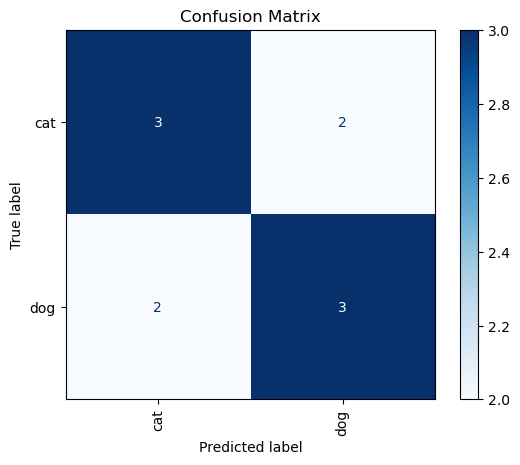

In [12]:
# 📌 Step 5: Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = df['true_label']
y_pred = df['predicted_label']
labels = sorted(df['true_label'].unique())

cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

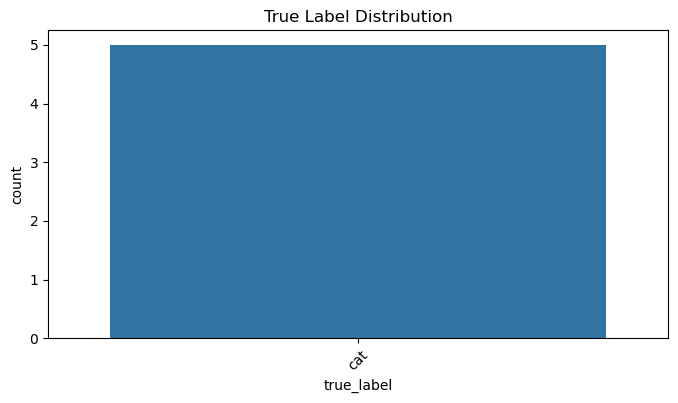

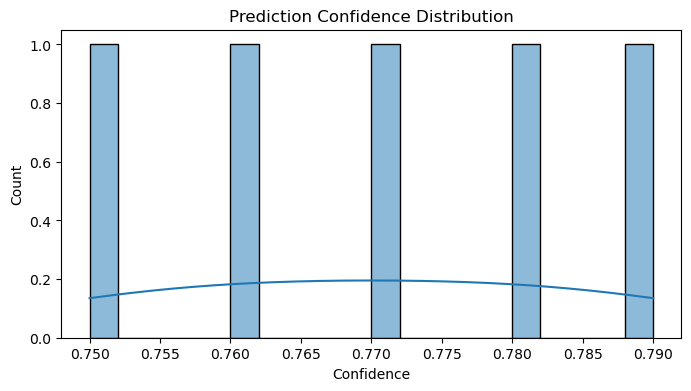

In [6]:
# 📌 Step 6: Class Distribution and Confidence Histogram

# Class distribution
plt.figure(figsize=(8,4))
sns.countplot(x='true_label', data=df, order=labels)
plt.title("True Label Distribution")
plt.xticks(rotation=45)
plt.show()

# Confidence histogram
plt.figure(figsize=(8,4))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title("Prediction Confidence Distribution")
plt.xlabel("Confidence")
plt.show()

In [13]:
# 📌 Step 7: Optional – t-SNE Plot of Feature Embeddings (if available)

# Suppose you have features.npy with model embeddings of each input
# And same order of inputs as in results.csv

if os.path.exists('features.npy'):
    features = np.load('features.npy')  # shape: (n_samples, n_features)
    tsne = TSNE(n_components=2, random_state=42)
    reduced = tsne.fit_transform(features)

    le = LabelEncoder()
    y_enc = le.fit_transform(df['true_label'])

    plt.figure(figsize=(8,6))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=y_enc, cmap='tab10', alpha=0.7)
    plt.legend(handles=scatter.legend_elements()[0], labels=le.classes_, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title("t-SNE Visualization of Feature Embeddings")
    plt.show()